# **All needed library imports**

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import time

# **All needed labels and constants**

In [0]:
# Here we define the labels to be used in obtaining the data
axial = 'axial';
coronal = 'coronal';
sagittal = 'sagittal';
valid = 'valid';
train = 'train';
acl = 'acl';
meniscal = 'meniscus';
abnormal = 'abnormal';
path = '/content/drive/My Drive/MRNET data set/MRNet-v1.0';
delim = '/';
extension_numpy = '.npy';
extension_csv = '.csv';

# **Obtaining the data for training in a correct format**

In [0]:
# importing the drive to obtain the data files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# unzipping the data zip file
!unzip '/content/drive/My Drive/MRNET data set/MRNet-v1.0.zip' -d '/content/drive/My Drive/MRNET data set'

Archive:  /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip
warning [/content/drive/My Drive/MRNET data set/MRNet-v1.0.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
   creating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/
  inflating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid-abnormal.csv  
   creating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/
   creating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/axial/
  inflating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/axial/1139.npy  
  inflating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/axial/1138.npy  
  inflating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/axial/1249.npy  
  inflating: /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid/axial/1248.npy  
  inflating: /content/drive/My Drive/MRNET data set/

In [0]:
# This function is used to obtain the data from drive to memory STILL NOT COMPLETE.....................
def get_data(set_type,series,anomaly,exam_no):
  path_input = path + delim  + set_type + delim + series + delim + exam_no + extension_numpy;
  path_output = path + delim + set_type + '-' + anomaly + extension_csv; 
  return path_input, path_output;

# **TESTING AREA TO TRY CODE**

Before stacking:
(28, 256, 256)
normal


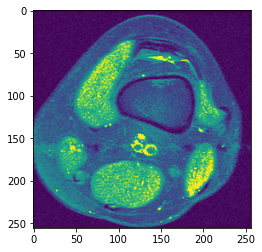

In [0]:
# TESTNIG
exam = 1138
path_input,path_output = get_data(valid,axial,acl,str(exam));
slice_num = 0
label = ['normal','acl']
slices = np.load(path_input)
# All rows in second column include the data output delimmited by a comma (csv file)
outputs = np.genfromtxt(path_output, delimiter= ',')[:,1].astype(int)
print('Before stacking:')
print(slices.shape)
plt.imshow(slices[slice_num])
print(label[outputs[exam - 1130]])


After stacking:
(28, 3, 256, 256)
normal


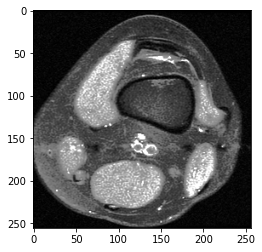

In [0]:
# stacking the slices 3 times to obtain them in a format suitable for training (3 channels)
# now each image in the slices is of dimensions 3 X 256 X 256 converting the MRI scan to a
# regular image shape
images = np.stack([slices]*3,axis = 3)
slices = np.stack([slices]*3,axis = 1)
number_slices = slices.shape[0]
print('After stacking:')
print(slices.shape)
plt.imshow(images[slice_num])
print(label[outputs[exam - 1130]])